# Water Quality Index Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- Here we are using Excel data which is retrived from PDfs of governemnt sites
- To open it using pandas we need extra library `openpyxl`
- Run below command separately in cell to install the library<br>
`!pip install openpyxl`


In [2]:
data = pd.read_excel('Narmada.xlsx')
print(data.shape)
data.head()

(46, 22)


,Station code,Name of the Monitoring Location,Unnamed: 2,State Name,Temp_MIN,Temp_MAX,DO_MIN,DO_MAX,pHMIN,pHMAX,...,BCO_MIN,BCO_MAX,N_MIN,N_MAX,FC_MIN,FC_MAX,TC_MIN,TC_MAX,FS_MIN,FS_MAX
0,3321,"NARMADA AT AMARKANTAKE FROM ORIGIN POINT, REWA",NaN,MADHYA PRADESH,18.5,29.5,7.5,8.4,7.5,8.01,...,BDL,1.7,BDL,0.49,2.0,18.0,26,43,2,2
1,1242,NARMADA NEAR SOURCE AT AMARKANTAK M.P.,NaN,MADHYA PRADESH,18.0,29.5,3.6,7.7,7.0,7.90,...,BDL,0.4,BDL,0.42,2.0,18.0,2,44,2,2
2,1241,NARMADA AT MANDLA NEAR ROAD BDG. M.P.,NaN,MADHYA PRADESH,17.2,26.0,6.8,8.3,7.2,8.70,...,BDL,2.6,BDL,0.8,2.0,14.0,17,48,-,-
3,1240,NARMADA AT NARSINGHPUR M.P.,NaN,MADHYA PRADESH,17.0,23.5,7.0,8.6,7.0,8.30,...,BDL,1.9,BDL,1.16,2.0,11.0,12,49,-,-
4,2106,NARMADA AT NEMAWAR,NaN,MADHYA PRADESH,22.0,28.0,7.0,7.9,7.3,8.30,...,BDL,2.0,0.31,51,2.0,18.0,28,49,2,2


In [3]:
data['BCO_MIN'].replace('BDL', np.nan, inplace=True)
data['N_MIN'].replace('BDL', np.nan, inplace=True)
data['N_MAX'].replace('BDL', np.nan, inplace=True)
data['FS_MIN'].replace('-', np.nan, inplace=True)
data['FS_MAX'].replace('-', np.nan, inplace=True) 

In [4]:
data.drop('Unnamed: 2', axis=1, inplace=True)
data.head()

,Station code,Name of the Monitoring Location,State Name,Temp_MIN,Temp_MAX,DO_MIN,DO_MAX,pHMIN,pHMAX,CondMIN,...,BCO_MIN,BCO_MAX,N_MIN,N_MAX,FC_MIN,FC_MAX,TC_MIN,TC_MAX,FS_MIN,FS_MAX
0,3321,"NARMADA AT AMARKANTAKE FROM ORIGIN POINT, REWA",MADHYA PRADESH,18.5,29.5,7.5,8.4,7.5,8.01,218,...,NaN,1.7,NaN,0.49,2.0,18.0,26,43,2.0,2.0
1,1242,NARMADA NEAR SOURCE AT AMARKANTAK M.P.,MADHYA PRADESH,18.0,29.5,3.6,7.7,7.0,7.90,183,...,NaN,0.4,NaN,0.42,2.0,18.0,2,44,2.0,2.0
2,1241,NARMADA AT MANDLA NEAR ROAD BDG. M.P.,MADHYA PRADESH,17.2,26.0,6.8,8.3,7.2,8.70,160,...,NaN,2.6,NaN,0.80,2.0,14.0,17,48,NaN,NaN
3,1240,NARMADA AT NARSINGHPUR M.P.,MADHYA PRADESH,17.0,23.5,7.0,8.6,7.0,8.30,170,...,NaN,1.9,NaN,1.16,2.0,11.0,12,49,NaN,NaN
4,2106,NARMADA AT NEMAWAR,MADHYA PRADESH,22.0,28.0,7.0,7.9,7.3,8.30,279,...,NaN,2.0,0.31,51.00,2.0,18.0,28,49,2.0,2.0


In [5]:
data.isna().sum()/len(data) * 100

Station code                        0.000000
Name of the Monitoring Location     0.000000
State Name                          0.000000
Temp_MIN                            0.000000
Temp_MAX                            0.000000
DO_MIN                              0.000000
DO_MAX                              0.000000
pHMIN                               0.000000
pHMAX                               0.000000
CondMIN                             0.000000
CondMAX                             0.000000
BCO_MIN                            50.000000
BCO_MAX                             0.000000
N_MIN                              36.956522
N_MAX                               6.521739
FC_MIN                              0.000000
FC_MAX                              0.000000
TC_MIN                              0.000000
TC_MAX                              0.000000
FS_MIN                             65.217391
FS_MAX                             65.217391
dtype: float64

In [6]:
data.fillna(data.mean(), inplace=True)
data.isna().sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27100\352761875.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Station code                       0
Name of the Monitoring Location    0
State Name                         0
Temp_MIN                           0
Temp_MAX                           0
DO_MIN                             0
DO_MAX                             0
pHMIN                              0
pHMAX                              0
CondMIN                            0
CondMAX                            0
BCO_MIN                            0
BCO_MAX                            0
N_MIN                              0
N_MAX                              0
FC_MIN                             0
FC_MAX                             0
TC_MIN                             0
TC_MAX                             0
FS_MIN                             0
FS_MAX                             0
dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27100\1382864802.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot:>

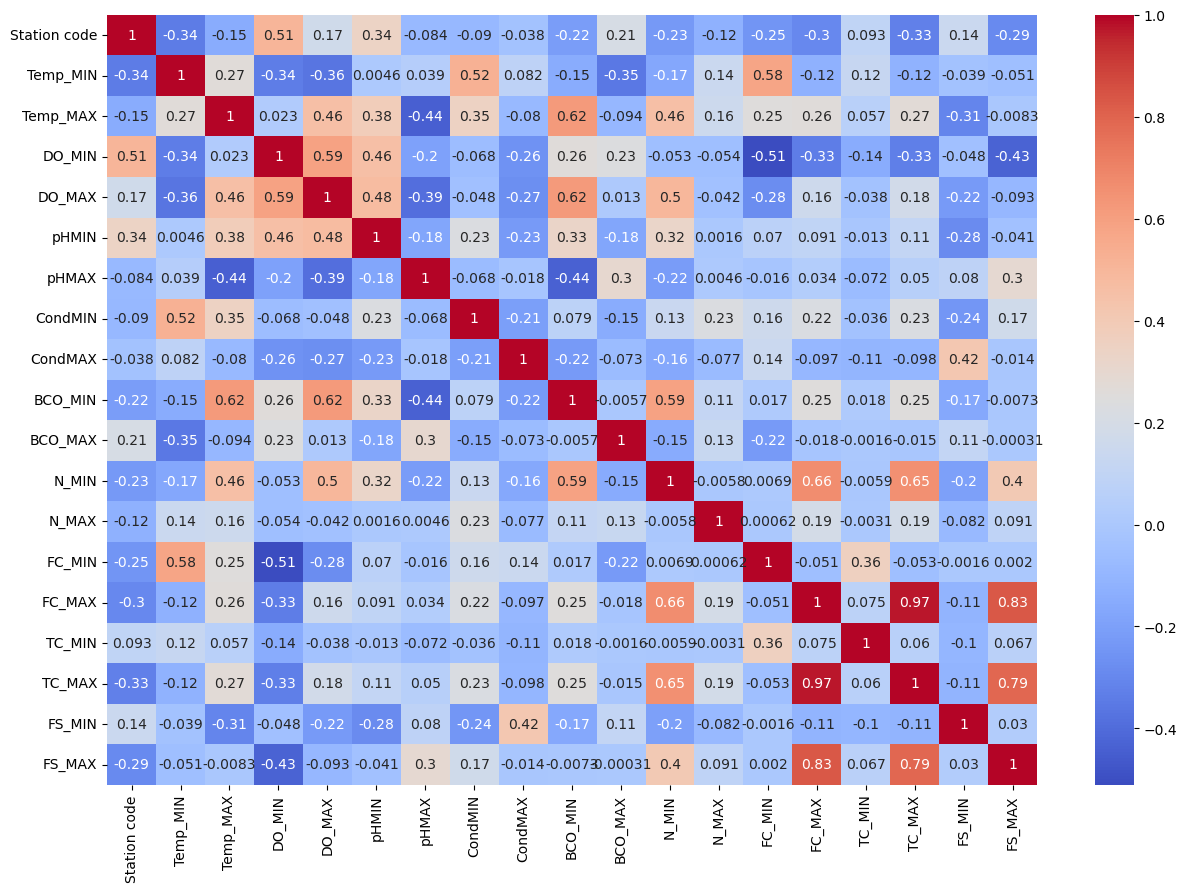

In [7]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [8]:
from numpy import mean
data['Tempearture(0 C)'] = (data['Temp_MIN'] + data['Temp_MAX']) / 2
data['Dissolved Oxygen (mg/ L)'] = (data['DO_MIN'] + data['DO_MAX'])/2
data['pH'] = (data['pHMIN'] + data['pHMAX'])/2
data['Conductivity (µmhos/cm)'] = (data['CondMIN']+ data['CondMAX'])/2
data['BCO (mg/ L)'] = (data['BCO_MIN']+ data['BCO_MAX'])/2
data['Nitrates(mg/l)'] = (data['N_MIN']+ data['N_MAX'])/2
data['Total Coliform(mg/l)'] = (data['TC_MIN'] + data['TC_MAX'])/2
data['Fecal Coliform (MPN/ 100 mL)'] = (data['FC_MIN']+ data['FC_MAX'])/2
data['Fecal Streptococci(mg/l)'] = (data['FS_MIN'] + data['FS_MAX'])/2
data.drop(['Temp_MIN', 'Temp_MAX', 'DO_MIN', 'DO_MAX', 'pHMIN', 'pHMAX', 'CondMIN', 'CondMAX', 'BCO_MIN', 'BCO_MAX', 'N_MIN', 'N_MAX', 'FS_MIN', 'FS_MAX', 'TC_MIN', 'TC_MAX', 'FC_MIN', 'FC_MAX'], axis=1, inplace=True)
data.head()

,Station code,Name of the Monitoring Location,State Name,Tempearture(0 C),Dissolved Oxygen (mg/ L),pH,Conductivity (µmhos/cm),BCO (mg/ L),Nitrates(mg/l),Total Coliform(mg/l),Fecal Coliform (MPN/ 100 mL),Fecal Streptococci(mg/l)
0,3321,"NARMADA AT AMARKANTAKE FROM ORIGIN POINT, REWA",MADHYA PRADESH,24.00,7.95,7.755,302.5,1.265217,0.630345,34.5,10.0,2.000
1,1242,NARMADA NEAR SOURCE AT AMARKANTAK M.P.,MADHYA PRADESH,23.75,5.65,7.450,1199.5,0.615217,0.595345,23.0,10.0,2.000
2,1241,NARMADA AT MANDLA NEAR ROAD BDG. M.P.,MADHYA PRADESH,21.60,7.55,7.950,261.5,1.715217,0.785345,32.5,8.0,2.875
3,1240,NARMADA AT NARSINGHPUR M.P.,MADHYA PRADESH,20.25,7.80,7.650,263.5,1.365217,0.965345,30.5,6.5,2.875
4,2106,NARMADA AT NEMAWAR,MADHYA PRADESH,25.00,7.45,7.800,319.5,1.415217,25.655000,38.5,10.0,2.000


In [9]:
data['npH']=data['pH'].apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
data['nDO']=data['Dissolved Oxygen (mg/ L)'].apply(lambda x: (100 if (x>=6)
                                    else(80 if  (5.9>=x>=5.5) 
                                        else(60 if (5.4>=x>=5) 
                                            else(40 if (4.9>=x>=4.5)
                                                else 0)))))         
data['nCond']=data['Conductivity (µmhos/cm)'].apply(lambda x: (100 if (x<=500)
                                    else(80 if  (501<=x<=1000) 
                                        else(60 if (1001<=x<=1500) 
                                            else(40 if (1501<=x<=2000)
                                                else 0)))))                                 
data['nBCO']=data['BCO (mg/ L)'].apply(lambda x: (100 if (x<=1)
                                    else(80 if  (1.1<=x<=3) 
                                        else(60 if (3.1<=x<=5) 
                                            else(40 if (5.1<=x<=7)
                                                else 0)))))
data['nNitrates']=data['Nitrates(mg/l)'].apply(lambda x: (100 if (x<=1)
                                    else(80 if  (1.1<=x<=3) 
                                        else(60 if (3.1<=x<=5) 
                                            else(40 if (5.1<=x<=7)
                                                else 0)))))
data['nTC']=data['Total Coliform(mg/l)'].apply(lambda x: (100 if (x<=5000)
                                    else(80 if  (5001<=x<=10000) 
                                        else(60 if (10001<=x<=15000) 
                                            else(40 if (15001<=x<=20000)
                                                else 0)))))
data['nFC']=data['Fecal Coliform (MPN/ 100 mL)'].apply(lambda x: (100 if (x<=500)
                                    else(80 if  (501<=x<=1000) 
                                        else(60 if (1001<=x<=1500) 
                                            else(40 if (1501<=x<=2000)
                                                else 0)))))
data['nFS']=data['Fecal Streptococci(mg/l)'].apply(lambda x: (100 if (x<=1)
                                    else(80 if  (1.1<=x<=3) 
                                        else(60 if (3.1<=x<=5) 
                                            else(40 if (5.1<=x<=7)
                                                else 0)))))
data['nTemp']=data['Tempearture(0 C)'].apply(lambda x: (100 if (x>=30)
                                    else(80 if  (29>=x>=25) 
                                        else(60 if (24>=x>=20) 
                                            else(40 if (19>=x>=15)
                                                else 0)))))
data.head()


,Station code,Name of the Monitoring Location,State Name,Tempearture(0 C),Dissolved Oxygen (mg/ L),pH,Conductivity (µmhos/cm),BCO (mg/ L),Nitrates(mg/l),Total Coliform(mg/l),...,Fecal Streptococci(mg/l),npH,nDO,nCond,nBCO,nNitrates,nTC,nFC,nFS,nTemp
0,3321,"NARMADA AT AMARKANTAKE FROM ORIGIN POINT, REWA",MADHYA PRADESH,24.00,7.95,7.755,302.5,1.265217,0.630345,34.5,...,2.000,100,100,100,80,100,100,100,80,60
1,1242,NARMADA NEAR SOURCE AT AMARKANTAK M.P.,MADHYA PRADESH,23.75,5.65,7.450,1199.5,0.615217,0.595345,23.0,...,2.000,100,80,60,100,100,100,100,80,60
2,1241,NARMADA AT MANDLA NEAR ROAD BDG. M.P.,MADHYA PRADESH,21.60,7.55,7.950,261.5,1.715217,0.785345,32.5,...,2.875,100,100,100,80,100,100,100,80,60
3,1240,NARMADA AT NARSINGHPUR M.P.,MADHYA PRADESH,20.25,7.80,7.650,263.5,1.365217,0.965345,30.5,...,2.875,100,100,100,80,100,100,100,80,60
4,2106,NARMADA AT NEMAWAR,MADHYA PRADESH,25.00,7.45,7.800,319.5,1.415217,25.655000,38.5,...,2.000,100,100,100,80,0,100,100,80,80


# Next TASK is to find  Water Quality Index (WQI) for each parameter and then find the overall WQI for the water body.

Dissolved oxygen (OD) 0.17<br>
Coliforms 0.16<br>
pH 0.11<br>
Biochemical oxygen demand (BOD) 0.11<br>
Temperature 0.1<br>
Nitrates 0.1<br>
Total phosphate 0.1<br>
Turbidity 0.08<br>
Total solids (TDS) 0.07<br>

FC - < 2500 MPN/ 100 mL<br>
FS - < < 500 MPN/ 100 mL<br>
'Tempearture(0 C)'  25 C

'Dissolved Oxygen (mg/ L)' 5.0 mg/ L	

'pH',   7.5

'Conductivity (µmhos/cm)' 75000 µmhos/cm
       
'BCO (mg/ L)' < 3.0 mg/ L	

'Nitrates(mg/l)' 20


'Total Coliform(mg/l)' 5
       
       
'Fecal Coliform (MPN/ 100 mL)'2500 MPN/ 100 mL


'Fecal Streptococci(mg/l)'] 500 MPN/ 100 mL"	

In [10]:
data.columns

Index(['Station code', 'Name of the Monitoring Location', 'State Name',
       'Tempearture(0 C)', 'Dissolved Oxygen (mg/ L)', 'pH',
       'Conductivity (µmhos/cm)', 'BCO (mg/ L)', 'Nitrates(mg/l)',
       'Total Coliform(mg/l)', 'Fecal Coliform (MPN/ 100 mL)',
       'Fecal Streptococci(mg/l)', 'npH', 'nDO', 'nCond', 'nBCO', 'nNitrates',
       'nTC', 'nFC', 'nFS', 'nTemp'],
      dtype='object')

In [11]:
stand_values = {'Tempearture(0 C)': 25, 'Dissolved Oxygen (mg/ L)': 5, 'pH': 7.5, 'Conductivity (µmhos/cm)': 75000, 'BCO (mg/ L)': 3, 'Nitrates(mg/l)': 20, 'Total Coliform(mg/l)': 5, 'Fecal Coliform (MPN/ 100 mL)': 2500, 'Fecal Streptococci(MPN/100ml)':500 }
values = [25, 5, 7.5, 75000, 3, 20, 5, 2500, 500]
# sum the  inverse of the values
total = sum(1.0/v for v in values)
print(total)
k = 1/total
print(k)
# calculate the weights
weights = [k/v for v in values]
print(weights)
# convert to dataframe
weights =  pd.DataFrame(weights, index=stand_values.keys(), columns=['Weights'])
weights

0.9590799999999999
1.0426658881428037
[0.041706635525712146, 0.20853317762856075, 0.1390221184190405, 1.390221184190405e-05, 0.3475552960476012, 0.052133294407140186, 0.20853317762856075, 0.00041706635525712147, 0.0020853317762856076]


,Weights
Tempearture(0 C),0.041707
Dissolved Oxygen (mg/ L),0.208533
pH,0.139022
Conductivity (µmhos/cm),0.000014
BCO (mg/ L),0.347555
Nitrates(mg/l),0.052133
Total Coliform(mg/l),0.208533
Fecal Coliform (MPN/ 100 mL),0.000417
Fecal Streptococci(MPN/100ml),0.002085


In [12]:
data.drop(['Station code','Name of the Monitoring Location','State Name'], axis=1, inplace=True)
# multiply the weights by the to each row
data['nTemp'] = data['nTemp'].apply(lambda x: x * weights['Weights'][0])
data['nDO'] = data['nDO'].apply(lambda x: x * weights['Weights'][1])
data['npH'] = data['npH'].apply(lambda x: x * weights['Weights'][2])
data['nCond'] = data['nCond'].apply(lambda x: x * weights['Weights'][3])
data['nBCO'] = data['nBCO'].apply(lambda x: x * weights['Weights'][4])
data['nNitrates'] = data['nNitrates'].apply(lambda x: x * weights['Weights'][5])
data['nTC'] = data['nTC'].apply(lambda x: x * weights['Weights'][6])
data['nFC'] = data['nFC'].apply(lambda x: x * weights['Weights'][7])
data['nFS'] = data['nFS'].apply(lambda x: x * weights['Weights'][8])
data.head()

,Tempearture(0 C),Dissolved Oxygen (mg/ L),pH,Conductivity (µmhos/cm),BCO (mg/ L),Nitrates(mg/l),Total Coliform(mg/l),Fecal Coliform (MPN/ 100 mL),Fecal Streptococci(mg/l),npH,nDO,nCond,nBCO,nNitrates,nTC,nFC,nFS,nTemp
0,24.00,7.95,7.755,302.5,1.265217,0.630345,34.5,10.0,2.000,13.902212,20.853318,0.001390,27.804424,5.213329,20.853318,0.041707,0.166827,2.502398
1,23.75,5.65,7.450,1199.5,0.615217,0.595345,23.0,10.0,2.000,13.902212,16.682654,0.000834,34.755530,5.213329,20.853318,0.041707,0.166827,2.502398
2,21.60,7.55,7.950,261.5,1.715217,0.785345,32.5,8.0,2.875,13.902212,20.853318,0.001390,27.804424,5.213329,20.853318,0.041707,0.166827,2.502398
3,20.25,7.80,7.650,263.5,1.365217,0.965345,30.5,6.5,2.875,13.902212,20.853318,0.001390,27.804424,5.213329,20.853318,0.041707,0.166827,2.502398
4,25.00,7.45,7.800,319.5,1.415217,25.655000,38.5,10.0,2.000,13.902212,20.853318,0.001390,27.804424,0.000000,20.853318,0.041707,0.166827,3.336531


In [13]:
# calculating the WQI
data['WQI'] = data['nTemp'] + data['nDO'] + data['npH'] + data['nCond'] + data['nBCO'] + data['nNitrates'] + data['nTC'] + data['nFC'] + data['nFS']

In [14]:
data.describe()


,Tempearture(0 C),Dissolved Oxygen (mg/ L),pH,Conductivity (µmhos/cm),BCO (mg/ L),Nitrates(mg/l),Total Coliform(mg/l),Fecal Coliform (MPN/ 100 mL),Fecal Streptococci(mg/l),npH,nDO,nCond,nBCO,nNitrates,nTC,nFC,nFS,nTemp,WQI
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,4.600000e+01,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,23.086957,7.722826,7.842609,451.489130,1.167391,1.967322,4540.108696,1388.584783,2.875000,1.390221e+01,20.671985,0.001306,26.142203,4.329330,19.493319,0.038987,0.159573,2.357332,87.096245
std,2.362848,0.741148,0.147444,402.202388,0.247060,3.754854,17626.295056,5449.158370,0.980363,3.591971e-15,0.859926,0.000210,10.687013,1.389654,5.205768,0.010412,0.028224,0.999481,12.233685
min,19.500000,5.550000,7.450000,232.500000,0.615217,0.464500,0.000000,1.000000,2.000000,1.390221e+01,16.682654,0.000556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.321169
25%,21.600000,7.450000,7.751250,263.125000,0.965217,0.805000,37.625000,1.900000,2.218750,1.390221e+01,20.853318,0.001390,27.804424,4.170664,20.853318,0.041707,0.166827,2.502398,87.793858
50%,22.300000,7.600000,7.850000,295.000000,1.200000,0.975345,40.750000,2.950000,2.875000,1.390221e+01,20.853318,0.001390,27.804424,5.213329,20.853318,0.041707,0.166827,2.502398,91.338505
75%,24.500000,7.800000,7.950000,337.750000,1.350000,1.896741,69.625000,10.000000,2.875000,1.390221e+01,20.853318,0.001390,34.755530,5.213329,20.853318,0.041707,0.166827,2.502398,94.066745
max,30.000000,9.300000,8.200000,1740.000000,1.750000,25.655000,80042.000000,28501.000000,7.500000,1.390221e+01,20.853318,0.001390,34.755530,5.213329,20.853318,0.041707,0.166827,4.170664,99.124161


In [15]:
data['WQI'].describe()

count    46.000000
mean     87.096245
std      12.233685
min      58.321169
25%      87.793858
50%      91.338505
75%      94.066745
max      99.124161
Name: WQI, dtype: float64

In [16]:
# categorise the WQI into 2 categories
data['WQI_cat'] = data['WQI'].apply(lambda x: 1 if (x>=90) else 0)
data.head()

,Tempearture(0 C),Dissolved Oxygen (mg/ L),pH,Conductivity (µmhos/cm),BCO (mg/ L),Nitrates(mg/l),Total Coliform(mg/l),Fecal Coliform (MPN/ 100 mL),Fecal Streptococci(mg/l),npH,nDO,nCond,nBCO,nNitrates,nTC,nFC,nFS,nTemp,WQI,WQI_cat
0,24.00,7.95,7.755,302.5,1.265217,0.630345,34.5,10.0,2.000,13.902212,20.853318,0.001390,27.804424,5.213329,20.853318,0.041707,0.166827,2.502398,91.338922,1
1,23.75,5.65,7.450,1199.5,0.615217,0.595345,23.0,10.0,2.000,13.902212,16.682654,0.000834,34.755530,5.213329,20.853318,0.041707,0.166827,2.502398,94.118808,1
2,21.60,7.55,7.950,261.5,1.715217,0.785345,32.5,8.0,2.875,13.902212,20.853318,0.001390,27.804424,5.213329,20.853318,0.041707,0.166827,2.502398,91.338922,1
3,20.25,7.80,7.650,263.5,1.365217,0.965345,30.5,6.5,2.875,13.902212,20.853318,0.001390,27.804424,5.213329,20.853318,0.041707,0.166827,2.502398,91.338922,1
4,25.00,7.45,7.800,319.5,1.415217,25.655000,38.5,10.0,2.000,13.902212,20.853318,0.001390,27.804424,0.000000,20.853318,0.041707,0.166827,3.336531,86.959725,0


In [17]:
data['WQI_cat'].value_counts()

1    30
0    16
Name: WQI_cat, dtype: int64

In [18]:
x = data.drop(['WQI','WQI_cat'], axis=1)
y = data['WQI_cat']

For Feature engineering We can use ` feature-engine ` <br>
`!pip install feature-engine`

In [19]:
!pip install feature-engine

Defaulting to user installation because normal site-packages is not writeable


In [20]:
from feature_engine.selection import DropDuplicateFeatures,DropCorrelatedFeatures,DropConstantFeatures,SmartCorrelatedSelection
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,n_jobs=4)
pip = Pipeline([('Constant',DropConstantFeatures(tol=0.98, variables=None)),('Duplicate',DropDuplicateFeatures(variables=None)),('Smart',SmartCorrelatedSelection(selection_method='variance',estimator=rf))])
xnew = pip.fit_transform(x)
print(xnew.shape)
print(xnew.columns)
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xnew, y, test_size=0.2, random_state=0)


(46, 12)
Index(['Tempearture(0 C)', 'Dissolved Oxygen (mg/ L)', 'pH',
       'Conductivity (µmhos/cm)', 'BCO (mg/ L)', 'Nitrates(mg/l)',
       'Total Coliform(mg/l)', 'Fecal Streptococci(mg/l)', 'nDO', 'nBCO',
       'nNitrates', 'nTemp'],
      dtype='object')


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [22]:
# apply SMOTE
from imblearn.over_sampling import SMOTE
smote_enn = SMOTE(random_state=42)
x_resampled,y_resampled = smote_enn.fit_resample(xnew,y)
x_resampled.shape,y_resampled.shape

((60, 12), (60,))

In [23]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)
kfold = KFold(n_splits=10, random_state=None)

# Regresssion Models

In [24]:
import evalml
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [25]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=x1_train, y_train=y1_train, problem_type="regression", max_batches=1)
automl.search()

{1: {'Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + Standard Scaler': '00:00',
  'Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer': '00:00',
  'Total time of batch': '00:01'}}

In [26]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,Random Forest Regressor w/ Replace Nullable Ty...,2,0.605945,0.605945,0.200406,374.233417,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,1,Elastic Net Regressor w/ Replace Nullable Type...,1,0.431433,0.431433,0.401943,295.254431,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,0,Mean Baseline Regression Pipeline,0,-0.220960,-0.220960,0.202291,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}


In [27]:
# Best first model.
automl.describe_pipeline(automl.rankings.iloc[0]['id'])


***************************************************************************
* Random Forest Regressor w/ Replace Nullable Types Transformer + Imputer *
***************************************************************************

Problem Type: regression
Model Family: Random Forest

Pipeline Steps
1. Replace Nullable Types Transformer
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. Random Forest Regressor
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 0.9 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.790        0.791     0.420     0.175 0.049 0.191                    0.222         32          

In [28]:
best_para = automl.best_pipeline
best_para.score(x1_test, y1_test, objectives=['r2','MSE','MAE','Root Mean Squared Error'])

OrderedDict([('R2', 0.9042884952380952),
             ('MSE', 0.023263212962962965),
             ('MAE', 0.13125),
             ('Root Mean Squared Error', 0.15252282767822975)])

In [29]:
# get second best pipeline
automl.describe_pipeline(automl.rankings.iloc[1]['id'])


*******************************************************************************************
* Elastic Net Regressor w/ Replace Nullable Types Transformer + Imputer + Standard Scaler *
*******************************************************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Replace Nullable Types Transformer
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. Standard Scaler
4. Elastic Net Regressor
	 * alpha : 0.0001
	 * l1_ratio : 0.15
	 * max_iter : 1000
	 * normalize : False

Training
Training for regression problems.
Total training time (including CV): 0.7 seconds

Cross Validation
----------------
                R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           -0.030       

In [30]:
# take second pipeline
model2 = automl.get_pipeline(automl.rankings.iloc[1]['id'])
model2.fit(x1_train, y1_train)
model2.score(x1_test, y1_test, objectives=['r2','MSE','MAE','Root Mean Squared Error'])

OrderedDict([('R2', 0.717190727465615),
             ('MSE', 0.06873836485210748),
             ('MAE', 0.15276898906300496),
             ('Root Mean Squared Error', 0.2621800237472479)])

In [31]:
#  Apply Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1_train, y1_train)
lr.score(x1_test, y1_test)

0.7168641561356262

In [32]:
# RMSE, MAE, MSE, RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
y_pred = lr.predict(x1_test)
print('R2 Score: ', lr.score(x1_test, y1_test))
print('RMSE: ', np.sqrt(mean_squared_error(y1_test, y_pred)))
print('MAE: ', mean_absolute_error(y1_test, y_pred))
print('MSE: ', mean_squared_error(y1_test, y_pred))


R2 Score:  0.7168641561356262
RMSE:  0.2623313550228916
MAE:  0.15285284198421073
MSE:  0.06881773982814642


# Classification Models

[[7 0]
 [1 4]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5

    accuracy                           0.92        12
   macro avg       0.94      0.90      0.91        12
weighted avg       0.93      0.92      0.91        12

0.9166666666666666
0.8150000000000001
0.9333333333333332
0.7916666666666666
0.8790476190476191


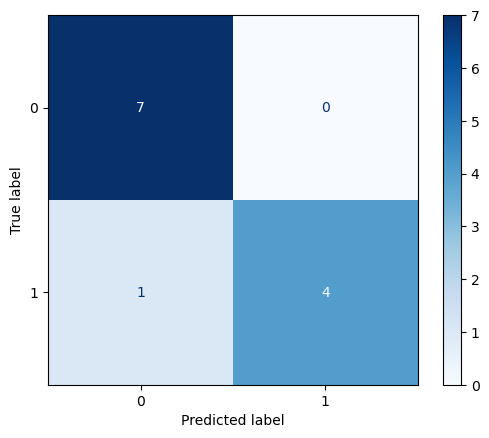

In [33]:
rf1 = RandomForestClassifier(n_estimators=10,n_jobs=4)
rf1.fit(x1_train, y1_train)
y1_pred = rf1.predict(x1_test)
print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))
print(accuracy_score(y1_test, y1_pred))
res = cross_val_score(rf1,x1_train, y1_train, cv=kfold, scoring='accuracy')
precision = cross_val_score(rf1,x1_train, y1_train, cv=kfold, scoring='precision')
recall = cross_val_score(rf1,x1_train, y1_train, cv=kfold, scoring='recall')
f1 = cross_val_score(rf1,x1_train, y1_train, cv=kfold, scoring='f1')
print(res.mean())
print(precision.mean())
print(recall.mean())
print(f1.mean())
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf1, x1_test, y1_test, cmap=plt.cm.Blues)
plt.show()

1.0
0.82
0.8083333333333332
0.875
0.8047619047619048
[[7 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

1.0


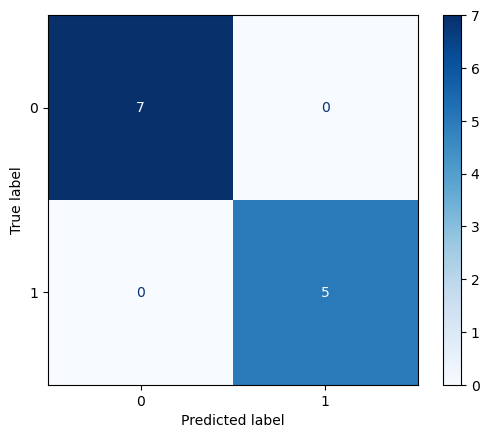

In [34]:
#  xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x1_train, y1_train)
print(xgb.score(x1_test, y1_test))
# evaluate the model
result1 = cross_val_score(xgb, x1_train, y1_train, cv=kfold, scoring='accuracy')
precision = cross_val_score(xgb, x1_train, y1_train, cv=kfold, scoring='precision')
recall = cross_val_score(xgb, x1_train, y1_train, cv=kfold, scoring='recall')
f1 = cross_val_score(xgb, x1_train, y1_train, cv=kfold, scoring='f1')
print(result1.mean())
print(precision.mean())
print(recall.mean())
print(f1.mean())
# classification report
y1_pred = xgb.predict(x1_test)
print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))
print(accuracy_score(y1_test, y1_pred))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb, x1_test, y1_test, cmap=plt.cm.Blues)
plt.show()


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

1.0


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

0.9800000000000001
1.0
0.9666666666666666
0.9800000000000001
[[7 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



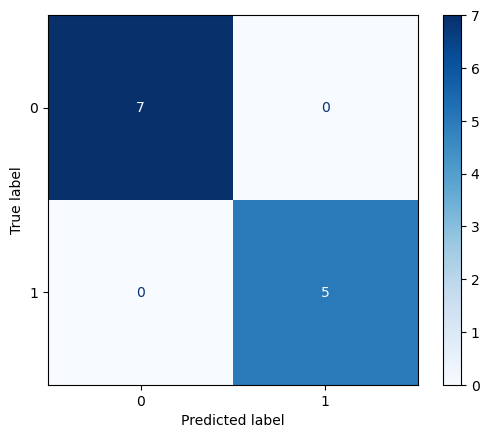

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(x1_train, y1_train)
print(lr1.score(x1_test, y1_test))
# evaluate the model
result2 = cross_val_score(lr1, x1_train, y1_train, cv=kfold, scoring='accuracy')
precision = cross_val_score(lr1, x1_train, y1_train, cv=kfold, scoring='precision')
recall = cross_val_score(lr1, x1_train, y1_train, cv=kfold, scoring='recall')
f1 = cross_val_score(lr1, x1_train, y1_train, cv=kfold, scoring='f1')
print(result2.mean())
print(precision.mean())
print(recall.mean())
print(f1.mean())
# classification report
y1_pred = lr1.predict(x1_test)
print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))
# plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr1, x1_test, y1_test, cmap=plt.cm.Blues)
plt.show()


In [36]:
import evalml.automl
# 10 k fold cross validation in evalml
automl_c = evalml.automl.AutoMLSearch(X_train=x1_train, y_train=y1_train, problem_type="binary", max_batches=1)
automl_c.search()

	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Mode Baseline Binary Classification Pipeline may not perform as estimated on unseen data.


{1: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler': '00:09',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer': '00:03',
  'Total time of batch': '00:13'}}

In [37]:
automl_c.rankings


,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Logistic Regression Classifier w/ Label Encode...,1,0.155770,0.155770,0.020744,99.134086,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,2,Random Forest Classifier w/ Label Encoder + Re...,2,0.378343,0.378343,0.055306,97.896823,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,0,Mode Baseline Binary Classification Pipeline,0,17.989096,17.989096,1.246570,0.000000,True,"{'Label Encoder': {'positive_label': None}, 'B..."


In [38]:
automl_c.describe_pipeline(automl.rankings.iloc[0]['id'])



********************************************************************************************
* Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer *
********************************************************************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Replace Nullable Types Transformer
3. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
4. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 3.2 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validat

In [39]:
best_para_c = automl_c.best_pipeline
best_para_c.score(x1_test, y1_test, objectives=['auc','f1','precision','recall'])

OrderedDict([('AUC', 1.0), ('F1', 1.0), ('Precision', 1.0), ('Recall', 1.0)])

In [40]:
# classification report
from sklearn.metrics import classification_report
y_pred = best_para_c.predict(x1_test)
print(classification_report(y1_test,y_pred))
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(best_para_c, x1_test, y1_test, cmap=plt.cm.Blues)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [41]:
# save the model
import joblib
joblib.dump(best_para_c, 'best_para_c.pkl')

['best_para_c.pkl']

1.0
0.96
0.9666666666666666
1.0
0.9800000000000001
[[7 0]
 [0 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



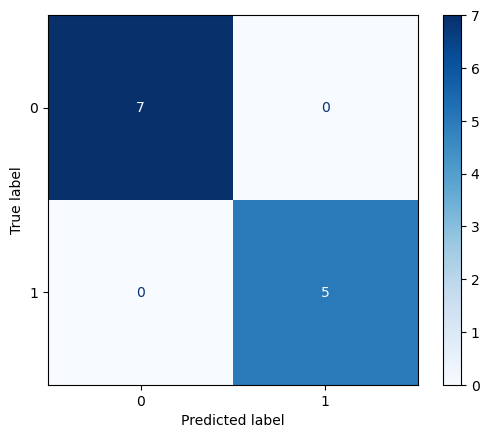

In [42]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x1_train, y1_train)
print(dt.score(x1_test, y1_test))
# evaluate the model
result3 = cross_val_score(dt, x1_train, y1_train, cv=kfold, scoring='accuracy')
precision = cross_val_score(dt, x1_train, y1_train, cv=kfold, scoring='precision')
recall = cross_val_score(dt, x1_train, y1_train, cv=kfold, scoring='recall')
f1 = cross_val_score(dt, x1_train, y1_train, cv=kfold, scoring='f1')
print(result3.mean())
print(precision.mean())
print(recall.mean())
print(f1.mean())
# classification report
y1_pred = dt.predict(x1_test)
print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, x1_test, y1_test, cmap=plt.cm.Blues)
plt.show()

0.5
0.55
0.5833333333333333
0.625
0.5395238095238095
[[2 5]
 [1 4]]
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.44      0.80      0.57         5

    accuracy                           0.50        12
   macro avg       0.56      0.54      0.49        12
weighted avg       0.57      0.50      0.47        12



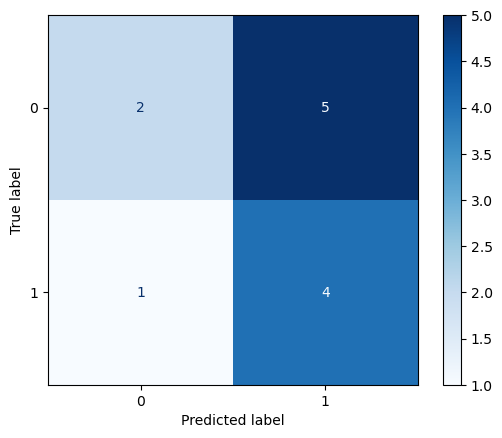

In [43]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x1_train, y1_train)
print(knn.score(x1_test, y1_test))
# evaluate the model
result4 = cross_val_score(knn, x1_train, y1_train, cv=kfold, scoring='accuracy')
precision = cross_val_score(knn, x1_train, y1_train, cv=kfold, scoring='precision')
recall = cross_val_score(knn, x1_train, y1_train, cv=kfold, scoring='recall')
f1 = cross_val_score(knn, x1_train, y1_train, cv=kfold, scoring='f1')
print(result4.mean())
print(precision.mean())
print(recall.mean())
print(f1.mean())
# classification report
y1_pred = knn.predict(x1_test)
print(confusion_matrix(y1_test,y1_pred))
print(classification_report(y1_test,y1_pred))
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x1_test, y1_test, cmap=plt.cm.Blues)
plt.show()